In [180]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [181]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [182]:
# switch to seaborn default stylistic parameters
sns.set()
sns.set_context('notebook')

In [183]:
df = pd.read_csv("https://www.dropbox.com/s/r1f53o4d4xtjudp/SHR76_20.csv?dl=1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827219 entries, 0 to 827218
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            827219 non-null  object 
 1   CNTYFIPS      827219 non-null  object 
 2   Ori           827219 non-null  object 
 3   State         827219 non-null  object 
 4   Agency        827219 non-null  object 
 5   Agentype      827219 non-null  object 
 6   Source        827219 non-null  object 
 7   Solved        827219 non-null  object 
 8   Year          827219 non-null  int64  
 9   StateName     22468 non-null   object 
 10  Month         827219 non-null  object 
 11  Incident      827219 non-null  int64  
 12  ActionType    827219 non-null  object 
 13  Homicide      827219 non-null  object 
 14  Situation     827219 non-null  object 
 15  VicAge        827219 non-null  int64  
 16  VicSex        827219 non-null  object 
 17  VicRace       827219 non-null  object 
 18  VicE

In [185]:
#a different way to check to see which column has empty index
df.isnull()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827214,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
827215,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
827216,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
827217,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [186]:
#doesn't apply for our project, but can just throw in since most prediction project like to use this to observer the info
df.describe()

,Year,Incident,VicAge,OffAge,VicCount,OffCount,FileDate
count,827219.000000,827219.000000,827219.000000,827219.000000,827219.000000,827219.000000,824709.000000
mean,1996.991040,28.947475,47.540888,352.717006,0.128523,0.185658,52603.878351
std,13.008957,110.180594,118.824307,456.035658,0.564474,0.596206,32519.244970
min,1976.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10181.000000
25%,1986.000000,1.000000,22.000000,24.000000,0.000000,0.000000,30180.000000
50%,1996.000000,2.000000,30.000000,38.000000,0.000000,0.000000,40605.000000
75%,2008.000000,10.000000,42.000000,999.000000,0.000000,0.000000,82306.000000
max,2020.000000,999.000000,999.000000,999.000000,21.000000,40.000000,123197.000000


In [187]:
#fill the empty index with "Not reported"
df.Subcircum = df.Subcircum.fillna('Not reported')
df.StateName = df.StateName.fillna('Not reported')
#whenever the offender is not known, the offender age is set to 999. Change it to the median age.
df.OffAge = df['OffAge'].replace(to_replace=999,value=df.OffAge.median())
df.VicAge = df['VicAge'].replace(to_replace=999,value=df.VicAge.median())
df

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197609001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,No,1976,Not reported,September,1,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30,Male,Black,Unknown or not reported,38,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,Not reported,0,0,30180.0,"Montgomery, AL"
1,197701001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,Not reported,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Female,Black,Unknown or not reported,62,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,Not reported,0,0,30180.0,"Montgomery, AL"
2,197703001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,Not reported,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,48,Male,White,Unknown or not reported,52,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,Not reported,0,1,30180.0,"Montgomery, AL"
3,197703001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1977,Not reported,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,Not reported,0,0,30180.0,"Montgomery, AL"
4,197708001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,Not reported,August,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17,Female,Black,Unknown or not reported,21,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,Not reported,0,0,30180.0,"Montgomery, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827214,198210001WY02300,"Weston, WY",WY02300,Wyoming,Weston County,Sheriff,FBI,Yes,1982,Not reported,October,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,21,Female,White,Not of Hispanic origin,23,Male,White,Not of Hispanic origin,"Personal weapons, includes beating",Girlfriend,Other arguments,Not reported,0,0,121482.0,Rural Wyoming
827215,198701001WY02300,"Weston, WY",WY02300,Wyoming,Weston County,Sheriff,FBI,Yes,1987,Not reported,January,1,Normal update,Manslaughter by negligence,Single victim/single offender,2,Male,White,Unknown or not reported,24,Female,White,Unknown or not reported,Asphyxiation - includes death by gas,Son,All other manslaughter by negligence,Not reported,0,0,61987.0,Rural Wyoming
827216,199412001WY02300,"Weston, WY",WY02300,Wyoming,Weston County,Sheriff,FBI,Yes,1994,Not reported,December,1,Normal update,Manslaughter by negligence,Single victim/single offender,35,Female,Asian,Unknown or not reported,30,Male,Asian,Unknown or not reported,Other or type unknown,Acquaintance,All other manslaughter by negligence,Not reported,0,0,22795.0,Rural Wyoming
827217,200405001WY02300,"Weston, WY",WY02300,Wyoming,Weston County,Sheriff,FBI,Yes,2004,Not reported,May,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,22,Female,White,Unknown or not reported,30,Male,White,Unknown or not reported,Other or type unknown,Girlfriend,Other arguments,Not reported,0,0,90704.0,Rural Wyoming


In [188]:
#drop the columns that we don't need
df.drop(['ID', 'CNTYFIPS', 'Ori', 'Agency', 'Agentype', 'Source', 'StateName', 'Month', 'Incident', 'ActionType', 'Subcircum', 'FileDate', 'MSA'], axis=1, inplace=True)
df

,State,Solved,Year,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount,OffCount
0,Alabama,No,1976,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30,Male,Black,Unknown or not reported,38,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,0,0
1,Alabama,Yes,1977,Murder and non-negligent manslaughter,Single victim/single offender,65,Female,Black,Unknown or not reported,62,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0
2,Alabama,Yes,1977,Murder and non-negligent manslaughter,Single victim/multiple offenders,48,Male,White,Unknown or not reported,52,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1
3,Alabama,Yes,1977,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,0,0
4,Alabama,Yes,1977,Murder and non-negligent manslaughter,Single victim/single offender,17,Female,Black,Unknown or not reported,21,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827214,Wyoming,Yes,1982,Murder and non-negligent manslaughter,Single victim/single offender,21,Female,White,Not of Hispanic origin,23,Male,White,Not of Hispanic origin,"Personal weapons, includes beating",Girlfriend,Other arguments,0,0
827215,Wyoming,Yes,1987,Manslaughter by negligence,Single victim/single offender,2,Male,White,Unknown or not reported,24,Female,White,Unknown or not reported,Asphyxiation - includes death by gas,Son,All other manslaughter by negligence,0,0
827216,Wyoming,Yes,1994,Manslaughter by negligence,Single victim/single offender,35,Female,Asian,Unknown or not reported,30,Male,Asian,Unknown or not reported,Other or type unknown,Acquaintance,All other manslaughter by negligence,0,0
827217,Wyoming,Yes,2004,Murder and non-negligent manslaughter,Single victim/single offender,22,Female,White,Unknown or not reported,30,Male,White,Unknown or not reported,Other or type unknown,Girlfriend,Other arguments,0,0


In [189]:
#now that the age values of 999 are removed, the averages are more reasonable values
df.describe()

,Year,VicAge,OffAge,VicCount,OffCount
count,827219.000000,827219.000000,827219.000000,827219.000000,827219.000000
mean,1996.991040,32.926567,33.392823,0.128523,0.185658
std,13.008957,16.032471,11.103965,0.564474,0.596206
min,1976.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,22.000000,24.000000,0.000000,0.000000
50%,1996.000000,30.000000,38.000000,0.000000,0.000000
75%,2008.000000,41.000000,38.000000,0.000000,0.000000
max,2020.000000,99.000000,99.000000,21.000000,40.000000


Text(0, 0.5, 'Homicides')

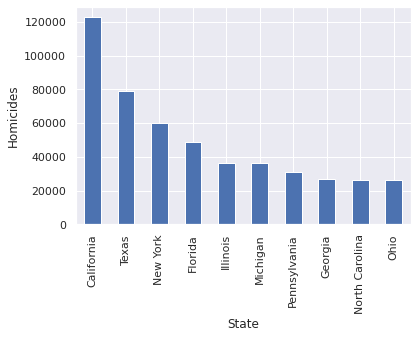

In [190]:
#this is a bar graph that represents the ten US states with the most homicides
df.value_counts(subset='State').sort_values(ascending=False)[:10].plot(kind="bar")
plt.xlabel('State')
plt.ylabel('Homicides')

Text(0, 0.5, 'Homicides')

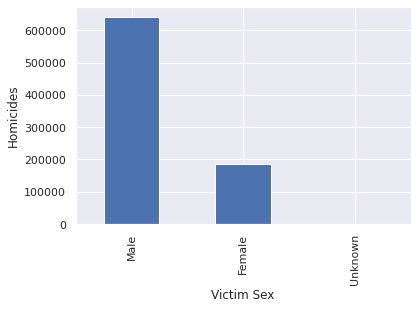

In [191]:
#this is a bar graph that represents the number male and female victims
df.value_counts(subset='VicSex').plot.bar()
plt.xlabel('Victim Sex')
plt.ylabel('Homicides')

Text(0, 0.5, 'Year')

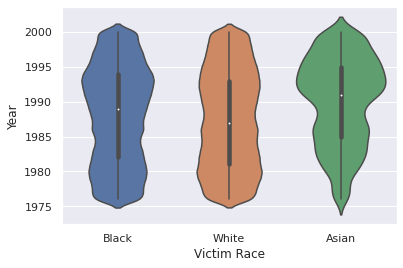

In [202]:
#this is a violin graph that represents the number of victims over time, and is organized by race
graph1 = df[df['VicRace'].isin(['Black', 'White', 'Asian'])]
graph1 = graph1[(graph1.Year >= 0) & (graph1.Year <= 2000)]
sns.violinplot(data=graph1, x='VicRace', y='Year')
plt.xlabel('Victim Race')
plt.ylabel('Year')

In [193]:
#create a smaller dataframe with the years and the number of homicides per year
df1 = pd.DataFrame()
df1['year'] = df.value_counts(subset='Year').sort_index().index
df1['homicides'] = df.value_counts(subset='Year').sort_index().values

In [194]:
#add two rows for the recent years not included in the data, set to median number of homicides
row = {'year':2021,'homicides':df1['homicides'].median()}
df1 = df1.append(row,ignore_index=True)
row = {'year':2022,'homicides':df1['homicides'].median()}
df1 = df1.append(row,ignore_index=True)
df1

,year,homicides
0,1976.0,17619.0
1,1977.0,18844.0
2,1978.0,19523.0
3,1979.0,21698.0
4,1980.0,23092.0
5,1981.0,21208.0
6,1982.0,20544.0
7,1983.0,19653.0
8,1984.0,18093.0
9,1985.0,18386.0


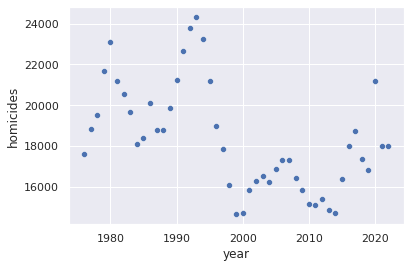

In [195]:
#plot the number of homicides for each year
sns.scatterplot(x='year',y='homicides',data=df1)

In [196]:
#use linear regression
X = df1[['year']].values
y = df1['homicides'].values
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

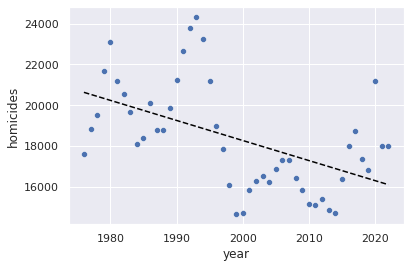

In [198]:
#plot the linear regression line
predict = reg.predict(X)
sns.scatterplot(x='year',y='homicides',data=df1)
plt.plot(X,predict,color='black',linestyle='dashed')

In [199]:
#the linear regression line doesn't fit the data very well so we'll use the polynomial features
X = df1[['year']].values
y = df1['homicides'].values
pf = PolynomialFeatures(degree=3,include_bias=False)
pf.fit(X)
X_poly = pf.transform(X)
reg2 = LinearRegression()
reg2.fit(X_poly,y)

LinearRegression()

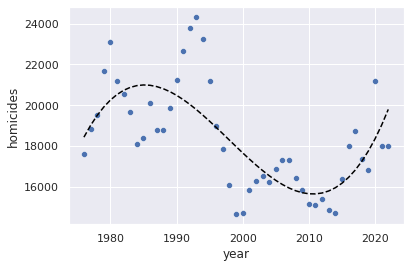

In [200]:
#plot the polynomial
predict = reg2.predict(X_poly)
sns.scatterplot(x='year',y='homicides',data=df1)
plt.plot(X,predict,color='black',linestyle='dashed')

In [201]:
#predict the number of homicides in 2022
predict_hom = predict[len(predict)-1]
print('The number of homicides predicted for 2022 is ' + str(np.round(predict_hom)))


The number of homicides predicted for 2022 is 19794.0
